In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
%cd "gdrive/MyDrive/usage-metering/data/"

Mounted at /content/gdrive/
/content/gdrive/MyDrive/usage-metering/data


In [2]:
print("list of csv files is ",[file for file in os.listdir() if file.endswith('.csv')])

list of csv files is  ['total_cpu_time_noninverted.csv', 'avg_memory_inverted.csv', 'avg_cpu_time_inverted.csv', 'numusers_inverted.csv', 'numusers_May2021.csv', 'total_cpu_time_numjobs.csv', 'total_memory_inverted.csv', 'numusers_all_inverted.csv', 'avg_cpu_time_all_inverted.csv', 'avg_cpu_time_all.csv', 'numjobs_numusers.csv', 'total_cpu_time_May2021.csv', 'avg_cpu_time_May2021.csv', 'total_cpu_time_all.csv', 'totalmemory_numjobs.csv', 'numusers_all.csv', 'totalmemory_all.csv', 'avg_memory_all.csv', 'total_cpu_time_inverted.csv', 'totalmemory_May2021.csv', 'numjobs_all.csv', 'total_cpu_time_all_inverted.csv', 'totalmemory_all_inverted.csv', 'numjobs_May2021.csv', 'avgmemory_all_inverted.csv', 'numjobs_all_inverted.csv', 'avgmemory_May2021.csv', '._avgmemory_May2021.csv', '._total_cpu_time_noninverted.csv', '._numusers_May2021.csv', '._numusers_inverted.csv', '._numjobs_all_inverted.csv', '._total_cpu_time_numjobs.csv', '._avg_memory_all.csv', '._avg_cpu_time_all.csv', '._avg_cpu_time

In [3]:
import pandas as pd
import numpy as np

numjobs_all = pd.read_csv('numjobs_all.csv')
print(numjobs_all.columns)
#print(numjobs_all['tool_name_version'])
print('number of entries in numjobs_all[tool_name_version]',numjobs_all['tool_name_version'].shape)
print('number of unique entries in numjobs_all[tool_name_version]',numjobs_all['tool_name_version'].unique().shape)
num_unique_tools = numjobs_all['tool_name_version'].unique().shape[0]

avg_jobs_for_each_tool = []

#index = 0
for tool_name_version in numjobs_all['tool_name_version'].unique():
  numjobs_tool = numjobs_all.loc[numjobs_all['tool_name_version'] == tool_name_version]
  #print(numjobs_tool)
  avg_jobs = np.mean(numjobs_tool['num_jobs'])
  #print('tool ',tool_name_version, 'has an average of ',avg_jobs,' jobs')
  avg_jobs_for_each_tool.append((tool_name_version,round(avg_jobs,3)))
  #index += 1

## convert to list
sorted(avg_jobs_for_each_tool,key = lambda k:k[1],reverse = True)



ten_most_popular_tools = [k[0] for k in avg_jobs_for_each_tool[:10]]
avg_jobs_ten_most_popular_tools = [k[1] for k in avg_jobs_for_each_tool[:10]]
#print(ten_most_popular_tools)
  #print('tool_name_version is ',tool_name_version)
#print(numjobs_all['num_jobs'])

Index(['Unnamed: 0', 'month_year', 'num_jobs', 'tool_name_version'], dtype='object')
number of entries in numjobs_all[tool_name_version] (24504,)
number of unique entries in numjobs_all[tool_name_version] (2732,)


current files are 
README.md
total_cpu_time_noninverted.csv
avg_memory_inverted.csv
avg_cpu_time_inverted.csv
numusers_inverted.csv
numusers_May2021.csv
total_cpu_time_numjobs.csv
total_memory_inverted.csv
numusers_all_inverted.csv
avg_cpu_time_all_inverted.csv
inverted_processed_result.py
avg_cpu_time_all.csv
numjobs_numusers.csv
total_cpu_time_May2021.csv
avg_cpu_time_May2021.csv
total_cpu_time_all.csv
totalmemory_numjobs.csv
numusers_all.csv
totalmemory_all.csv
avg_memory_all.csv
total_cpu_time_inverted.csv
totalmemory_May2021.csv
numjobs_all.csv
total_cpu_time_all_inverted.csv
totalmemory_all_inverted.csv
numjobs_May2021.csv
avgmemory_all_inverted.csv
process_query_results.py
numjobs_all_inverted.csv
avgmemory_May2021.csv
._avgmemory_May2021.csv
._total_cpu_time_noninverted.csv
._numusers_May2021.csv
._numusers_inverted.csv
._numjobs_all_inverted.csv
._total_cpu_time_numjobs.csv
._avg_memory_all.csv
._avg_cpu_time_all.csv
._avg_cpu_time_May2021.csv
._avg_cpu_time_inverted.csv
._tot

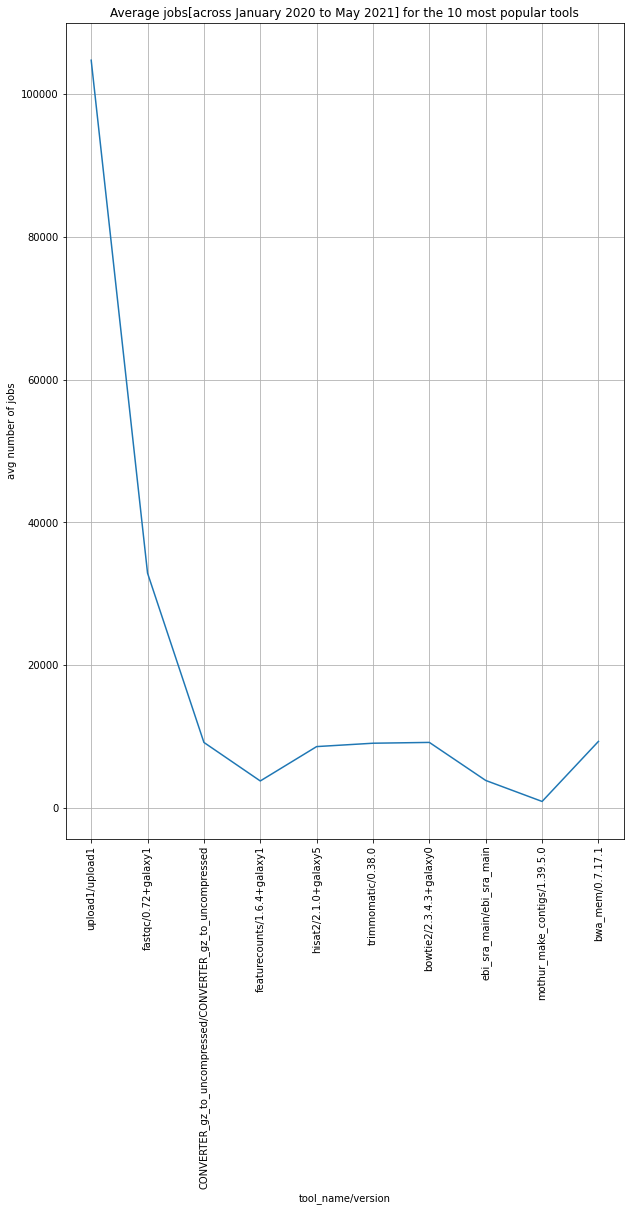

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,15))

plt.plot(ten_most_popular_tools,avg_jobs_ten_most_popular_tools)
plt.title('Average jobs[across January 2020 to May 2021] for the 10 most popular tools')
plt.xlabel('tool_name/version')
plt.ylabel('avg number of jobs')
plt.grid(axis="both")
plt.xticks(rotation = 90)
plt.savefig('avg_num_jobs_10_mostpopular_tools.png')
print("current files are ")

for file in os.listdir():
  print(file)

<p align= "justify">
Creating the plots of the total cpu time for each of the 10 most popular Galaxy tools in terms of their job requirements
</p>

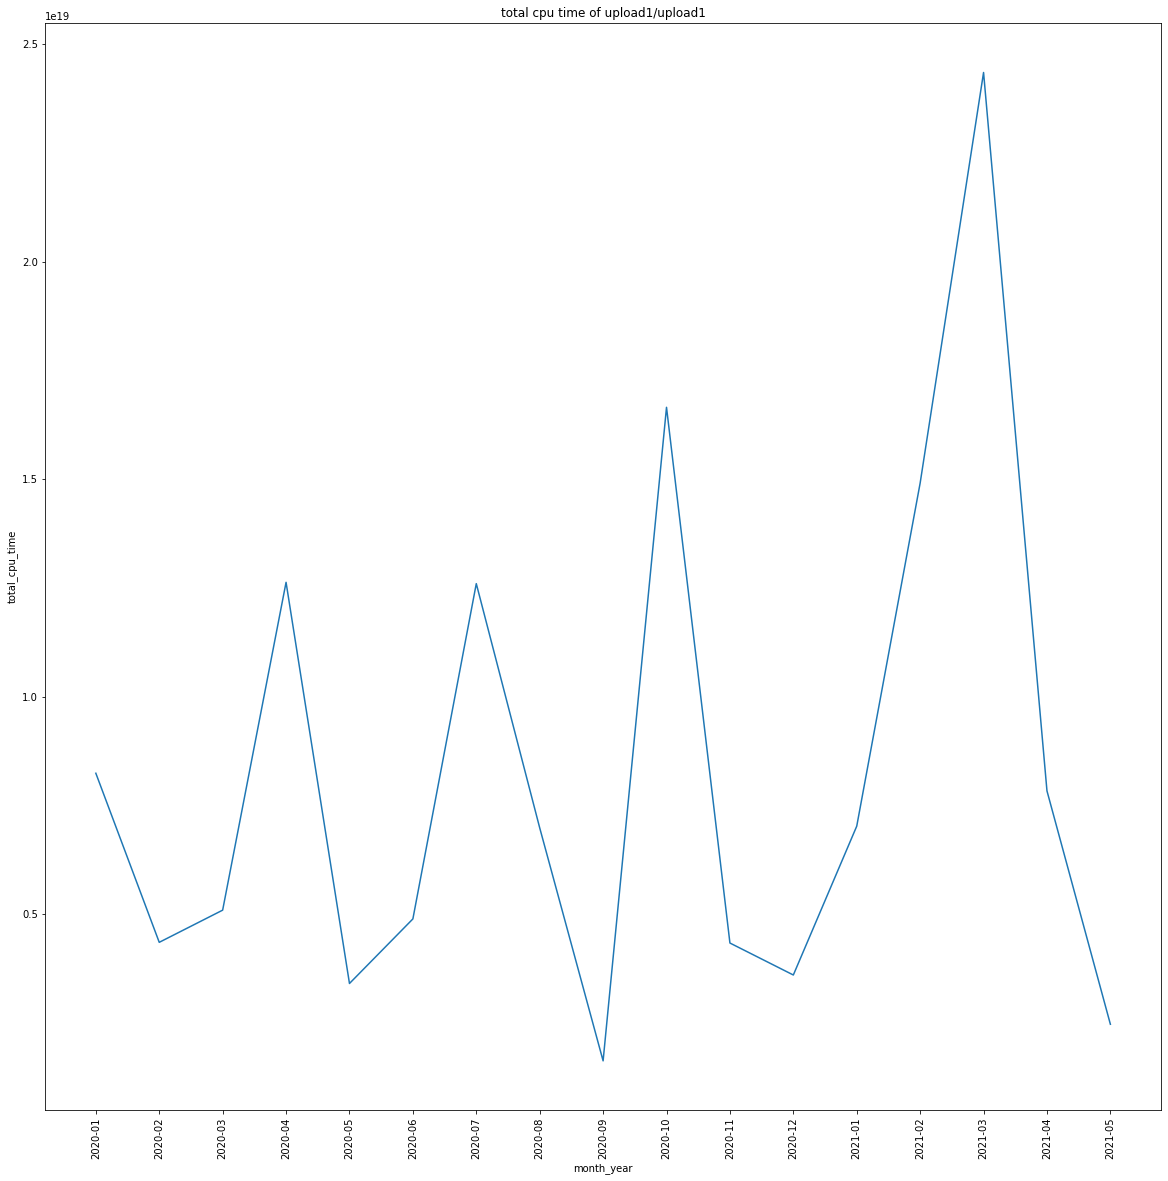

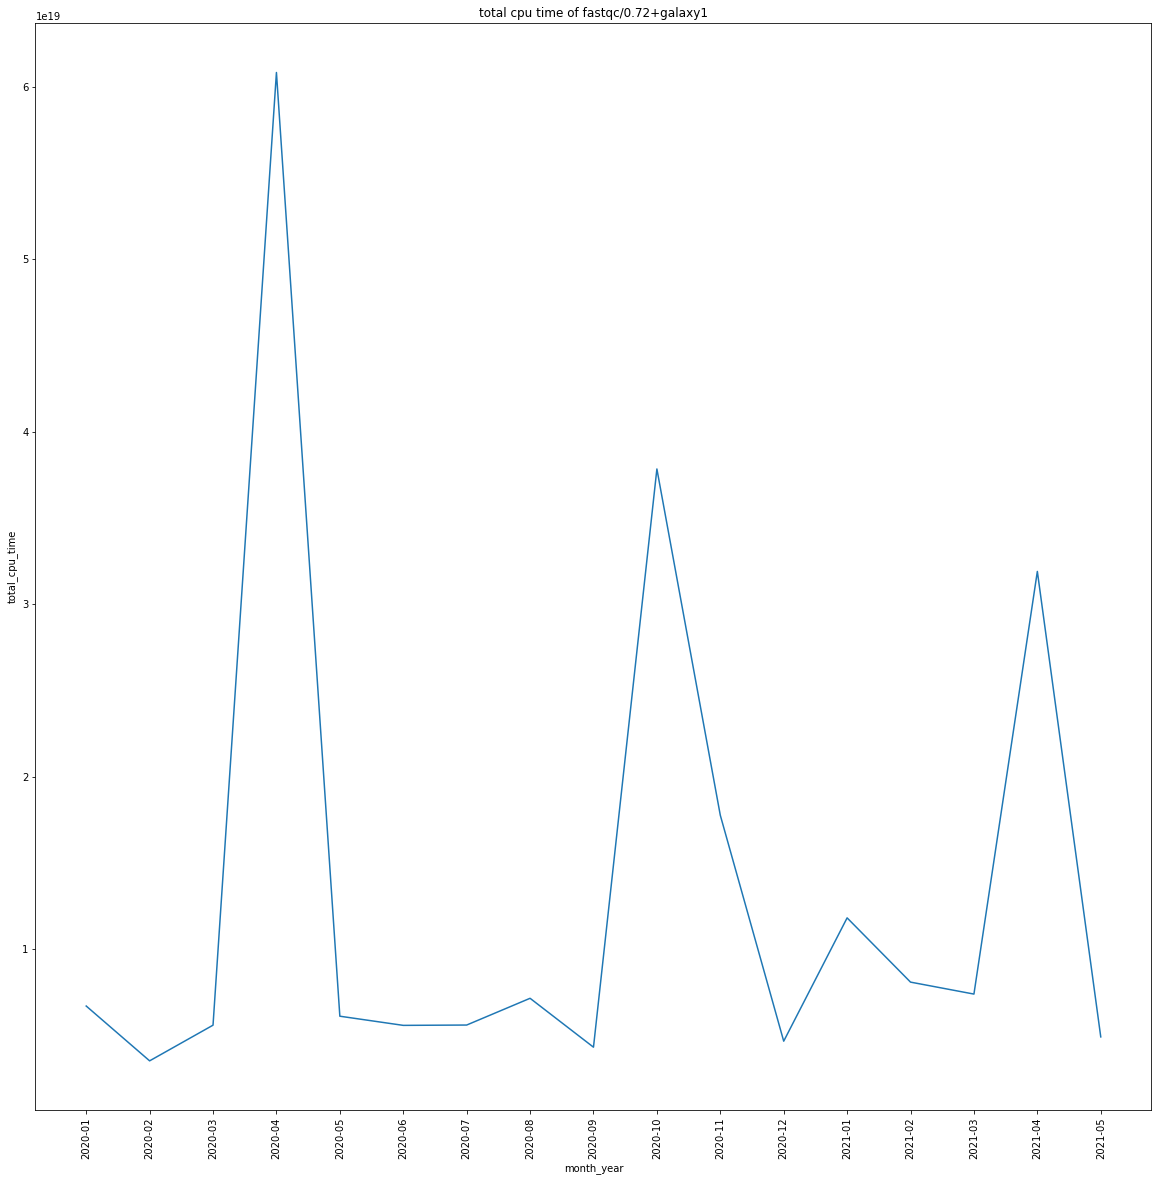

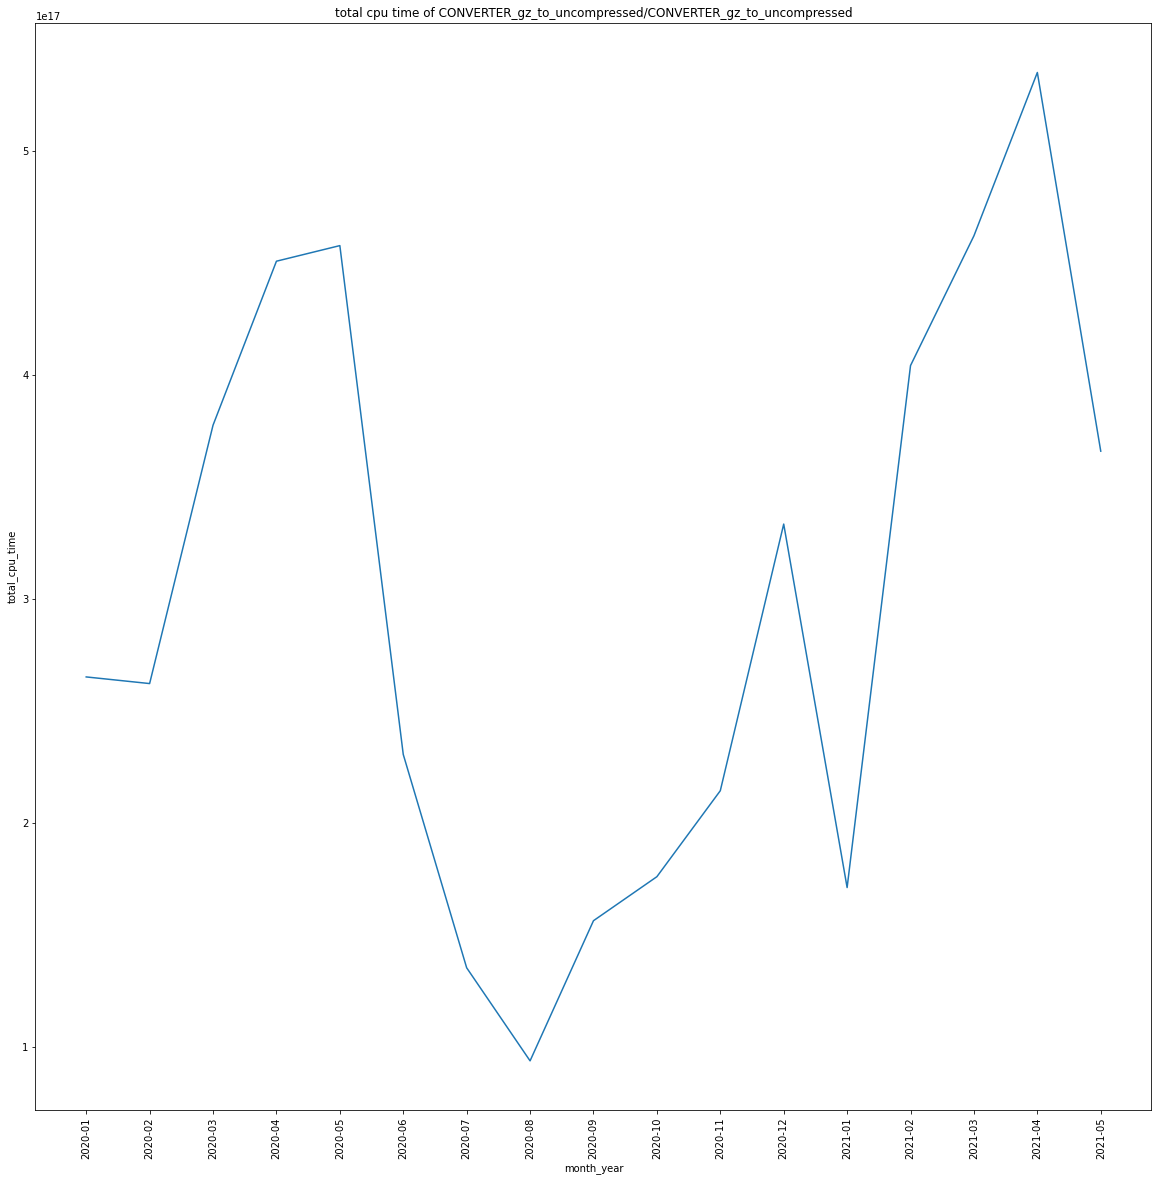

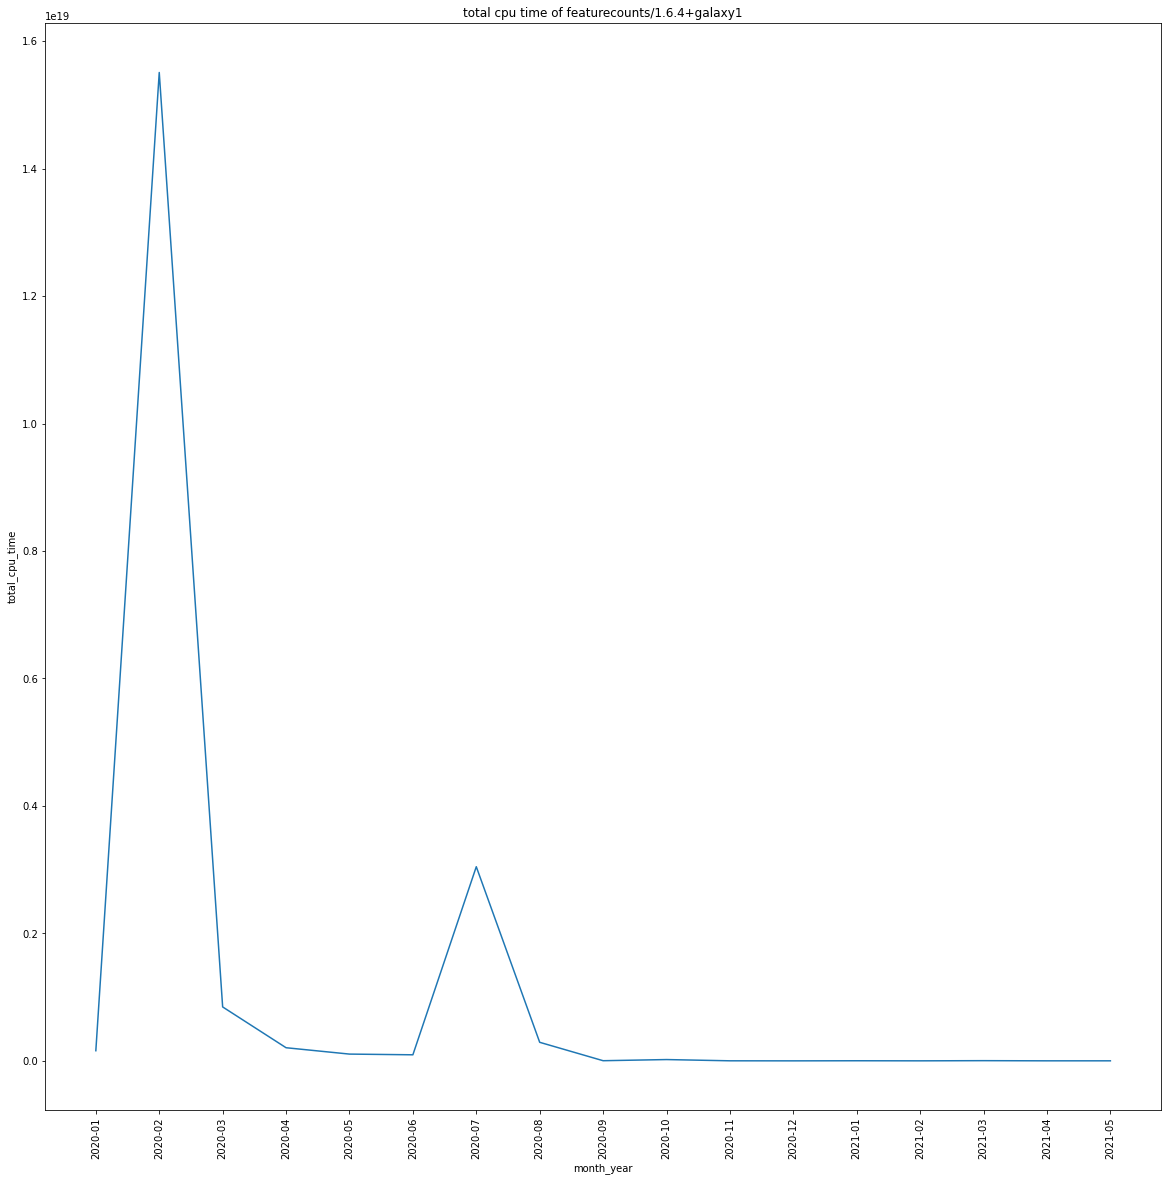

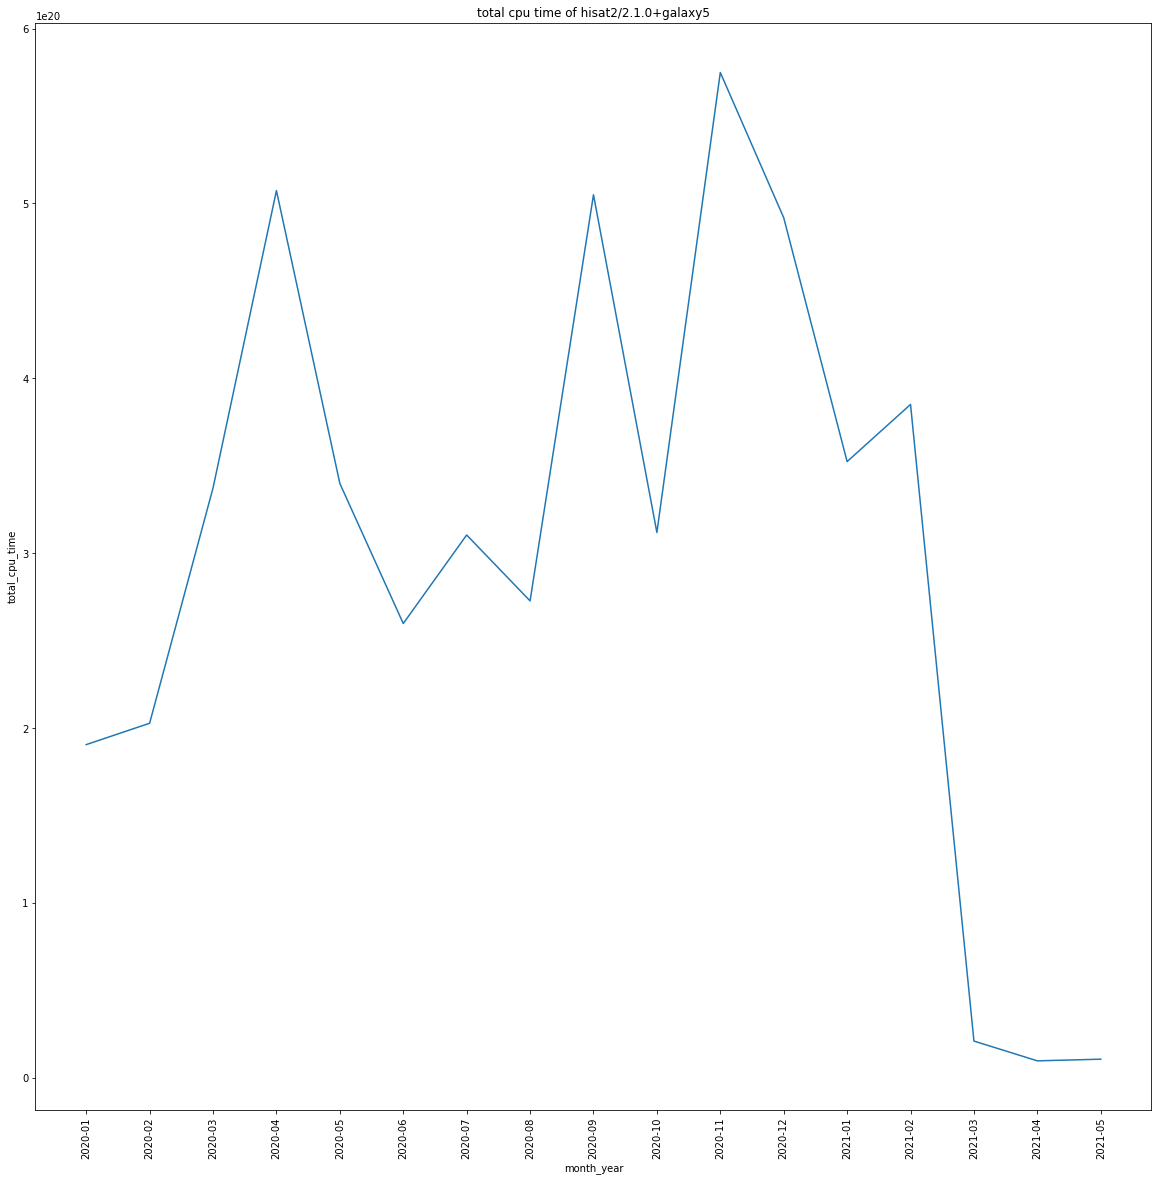

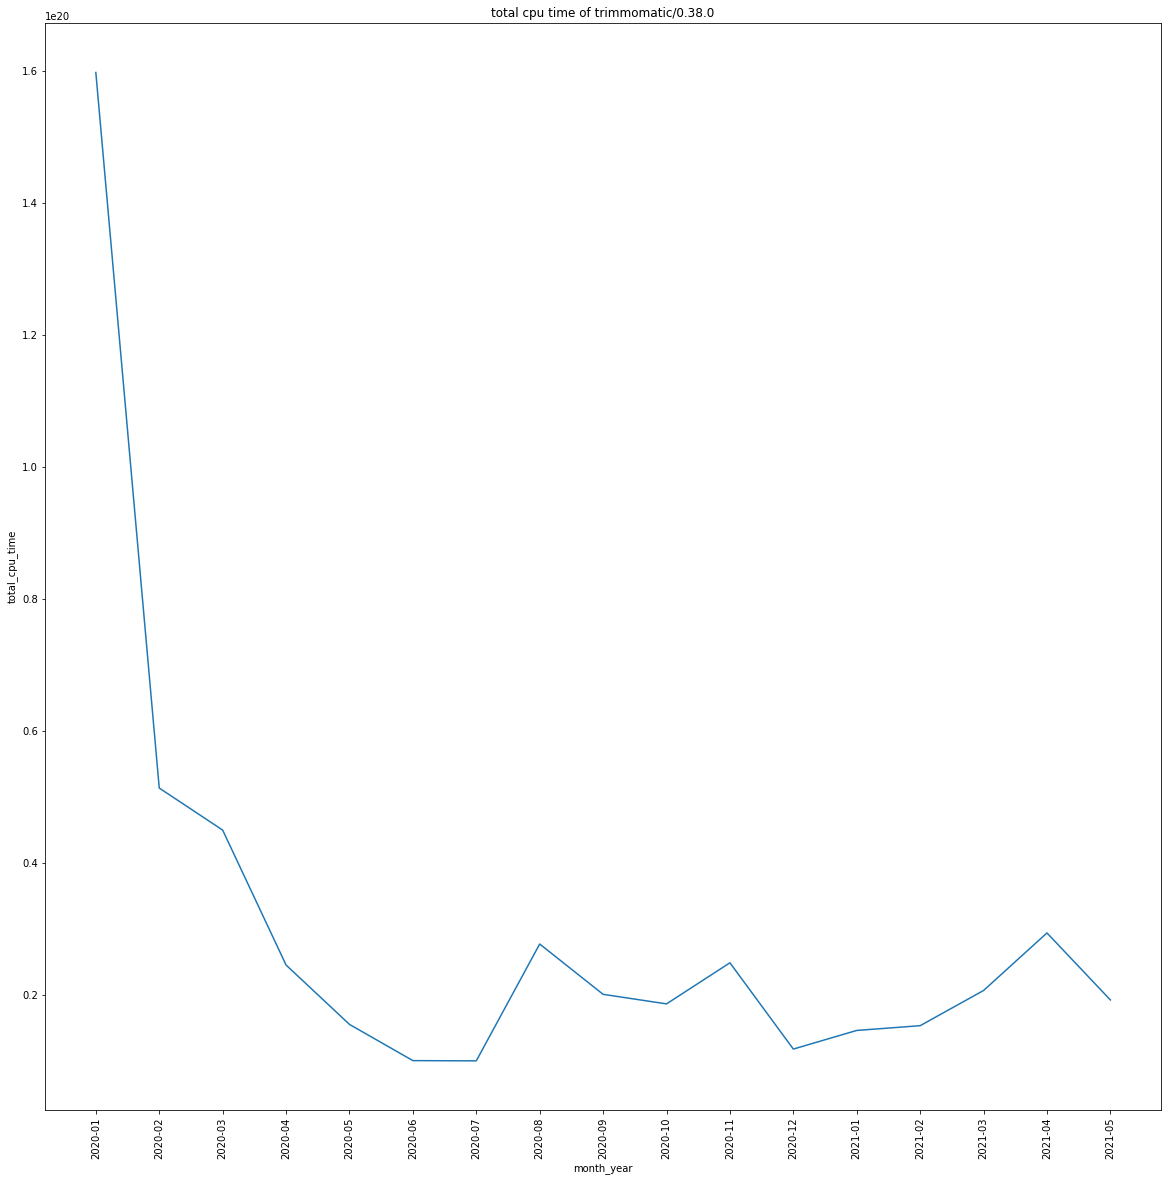

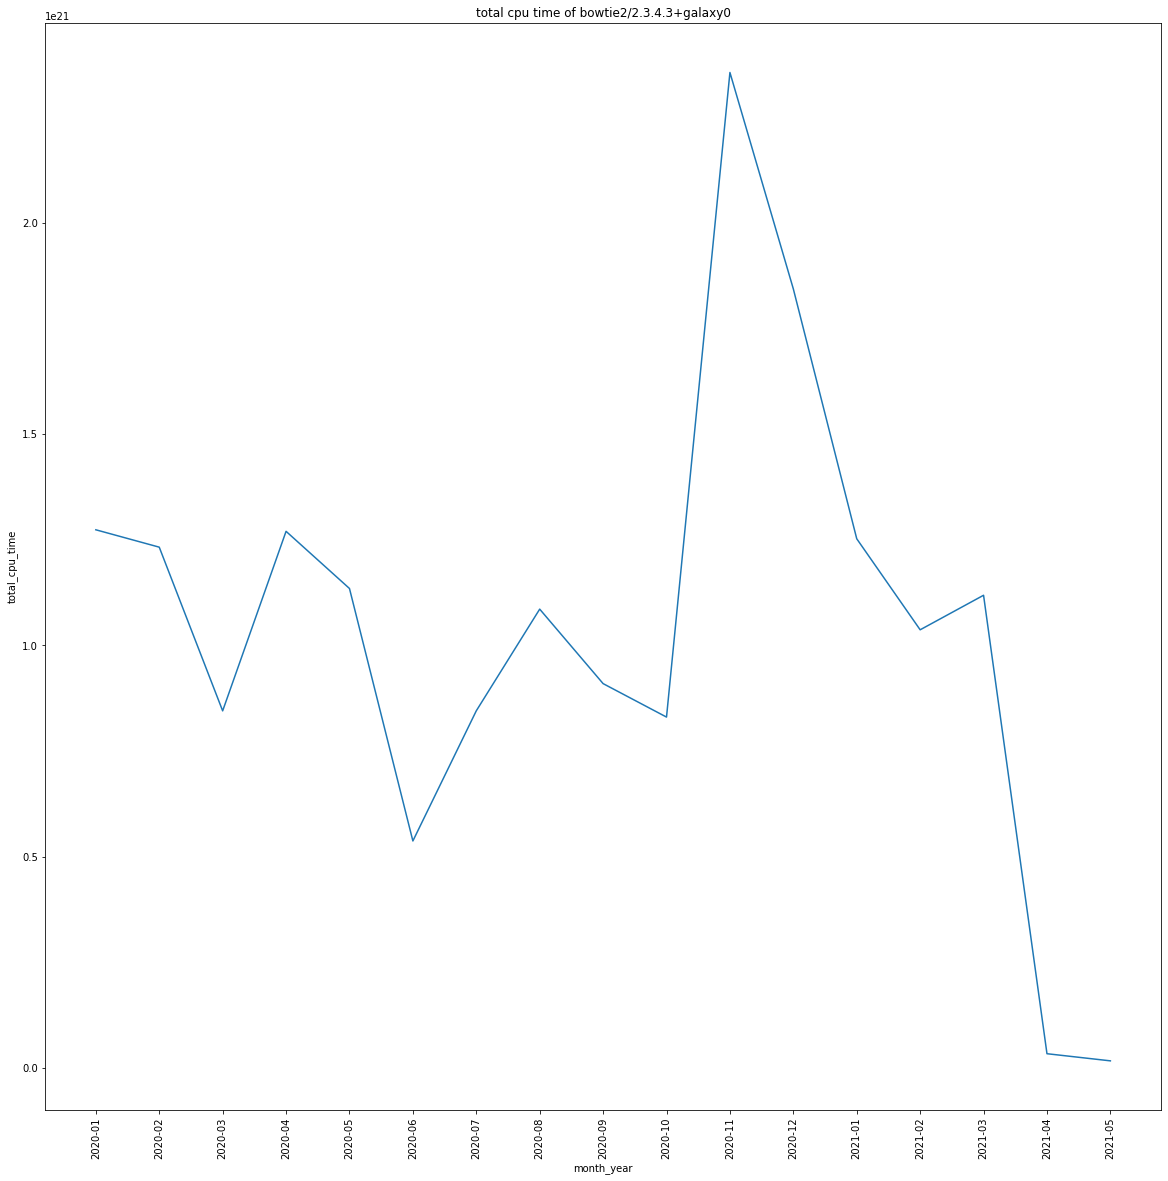

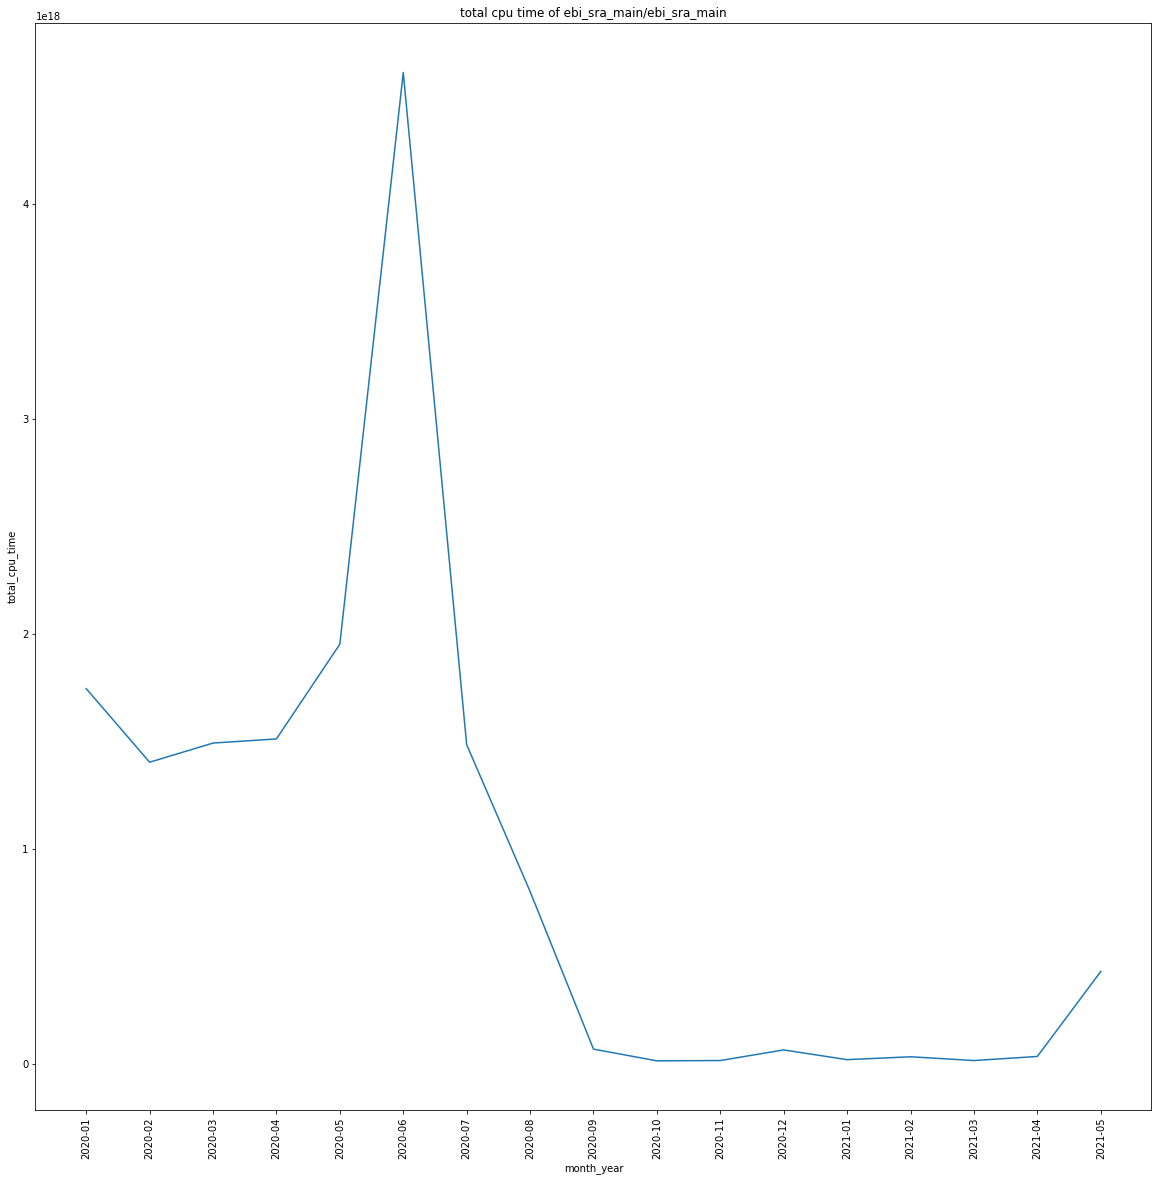

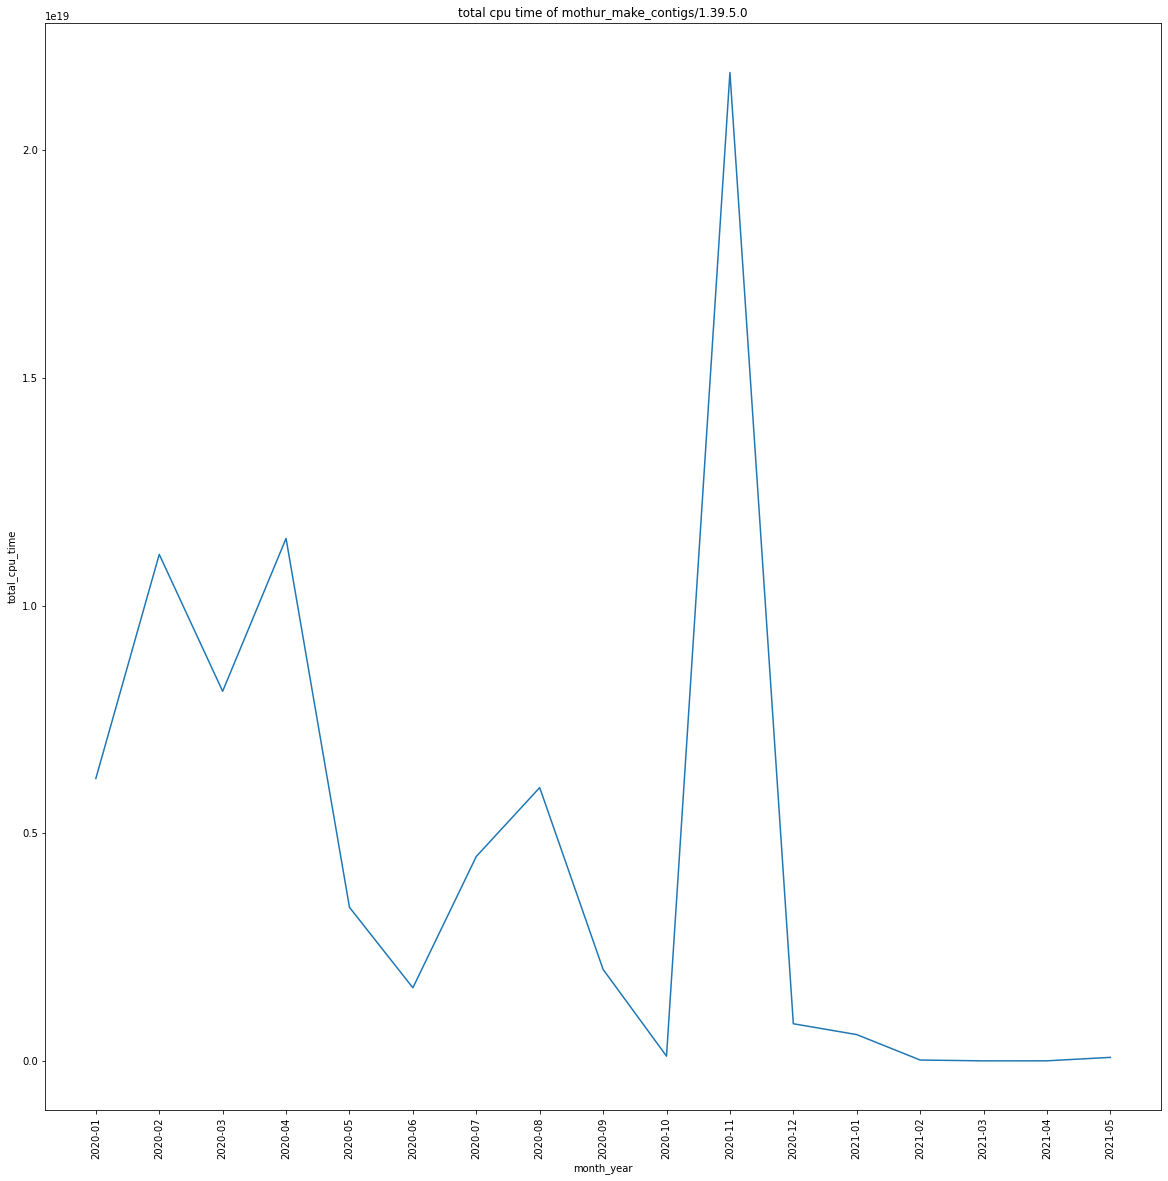

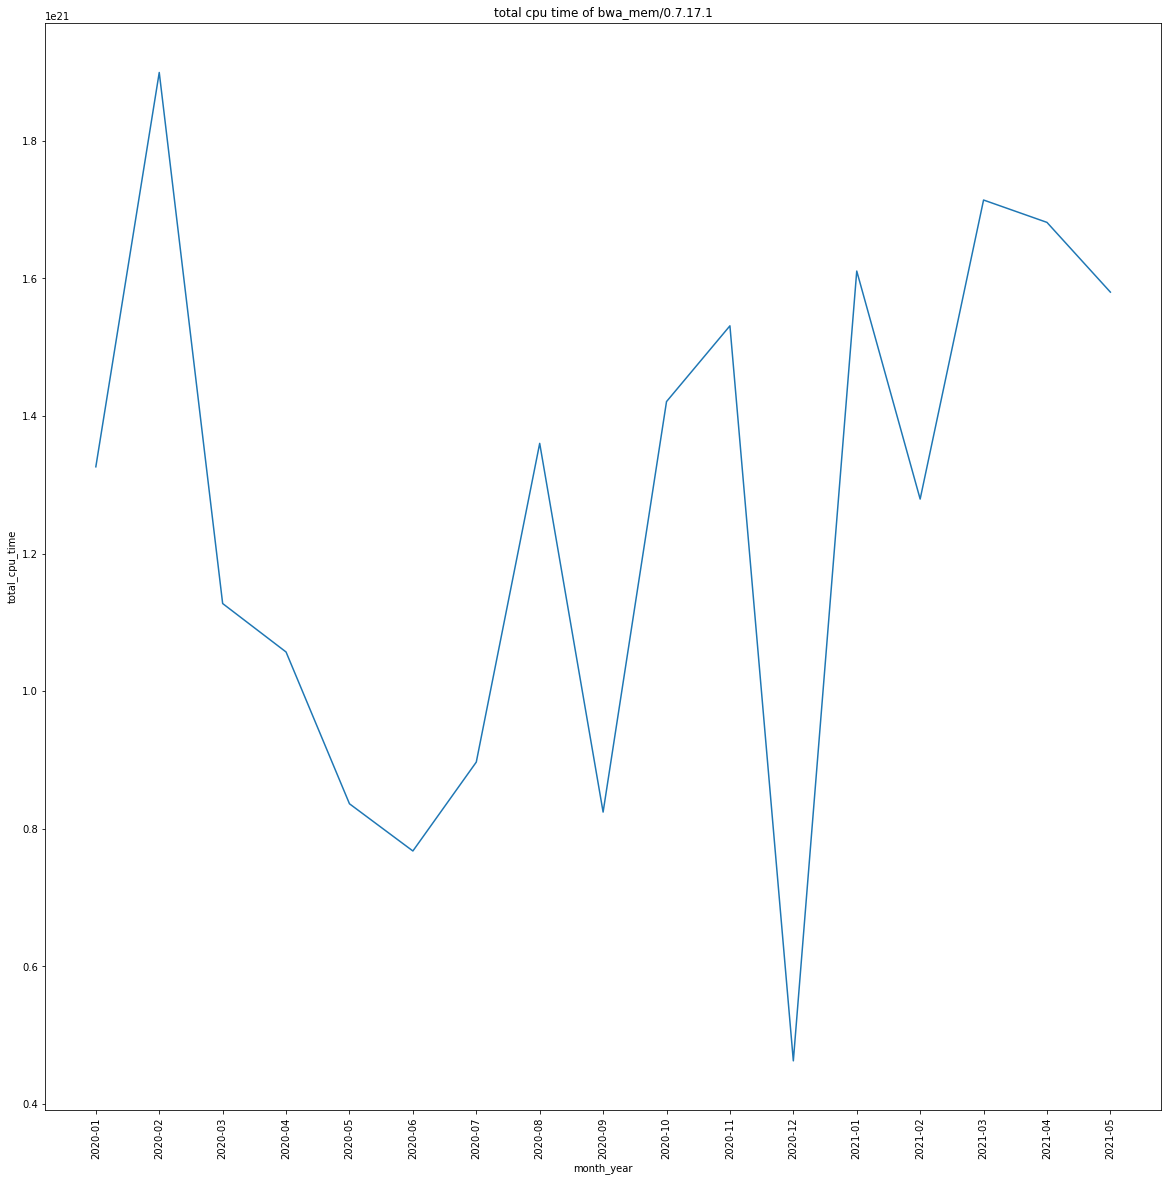

In [5]:
total_cpu_time_all = pd.read_csv('total_cpu_time_all.csv')

index = 0
for tool in ten_most_popular_tools:
  index += 1
  total_cpu_time_tool = total_cpu_time_all.loc[total_cpu_time_all['tool_name_version'] == tool]
  total_cpu_time_tool_list = [float((time).replace(' ','')) for time in total_cpu_time_tool['total_cpu_time']]
  month_year_tool = total_cpu_time_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (20,20))
  plt.plot(month_year_tool_processed,total_cpu_time_tool_list)
  plt.xticks(rotation = 90)

  title = 'total cpu time of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('total_cpu_time')
  file_name = "most_popular_tool" + str(index) + "_total_cpu_time"
  plt.savefig(file_name)
  #plt.savefig('abs.png')
  #plt.show()
#list(total_cpu_time_tool['total_cpu_time'])

<p align = "justify">
Below is the plots of the total memory over time for the 10 most popular Galaxy tools in terms of the number of jobs.
</p>

Index(['Unnamed: 0', 'month_year', 'totalmemory', 'tool_name_version'], dtype='object')
(23209, 4)
0        1.223794e+13
1        4.682561e+12
2        4.345103e+12
3        2.718884e+12
4        1.486880e+12
             ...     
23204    3.071494e+07
23205    3.071492e+07
23206    3.071492e+07
23207    3.071491e+07
23208    3.071491e+07
Name: totalmemory, Length: 23209, dtype: float64


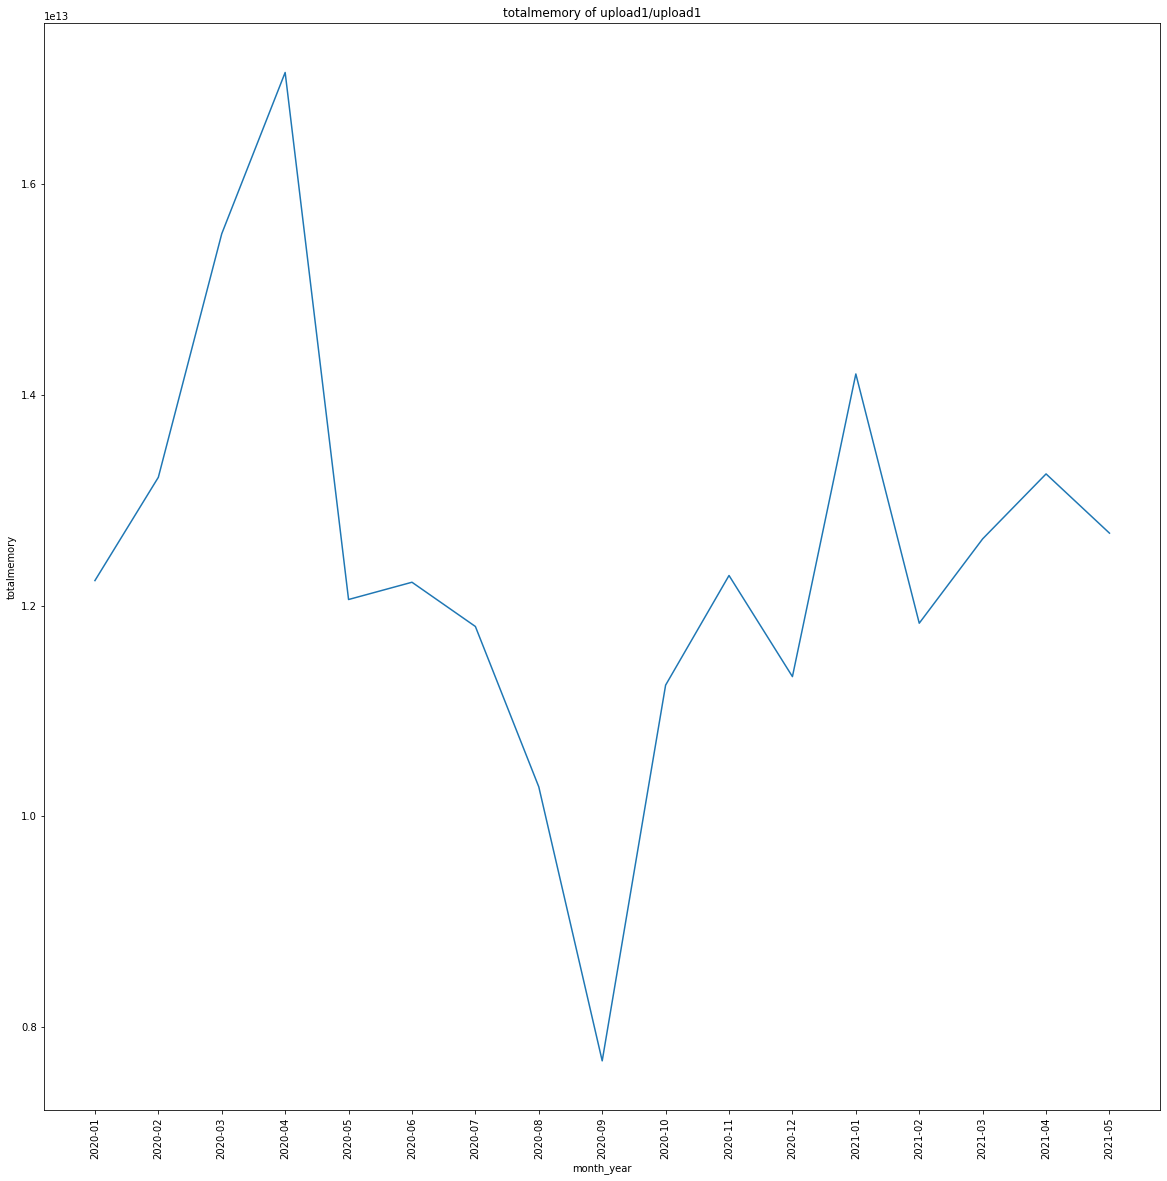

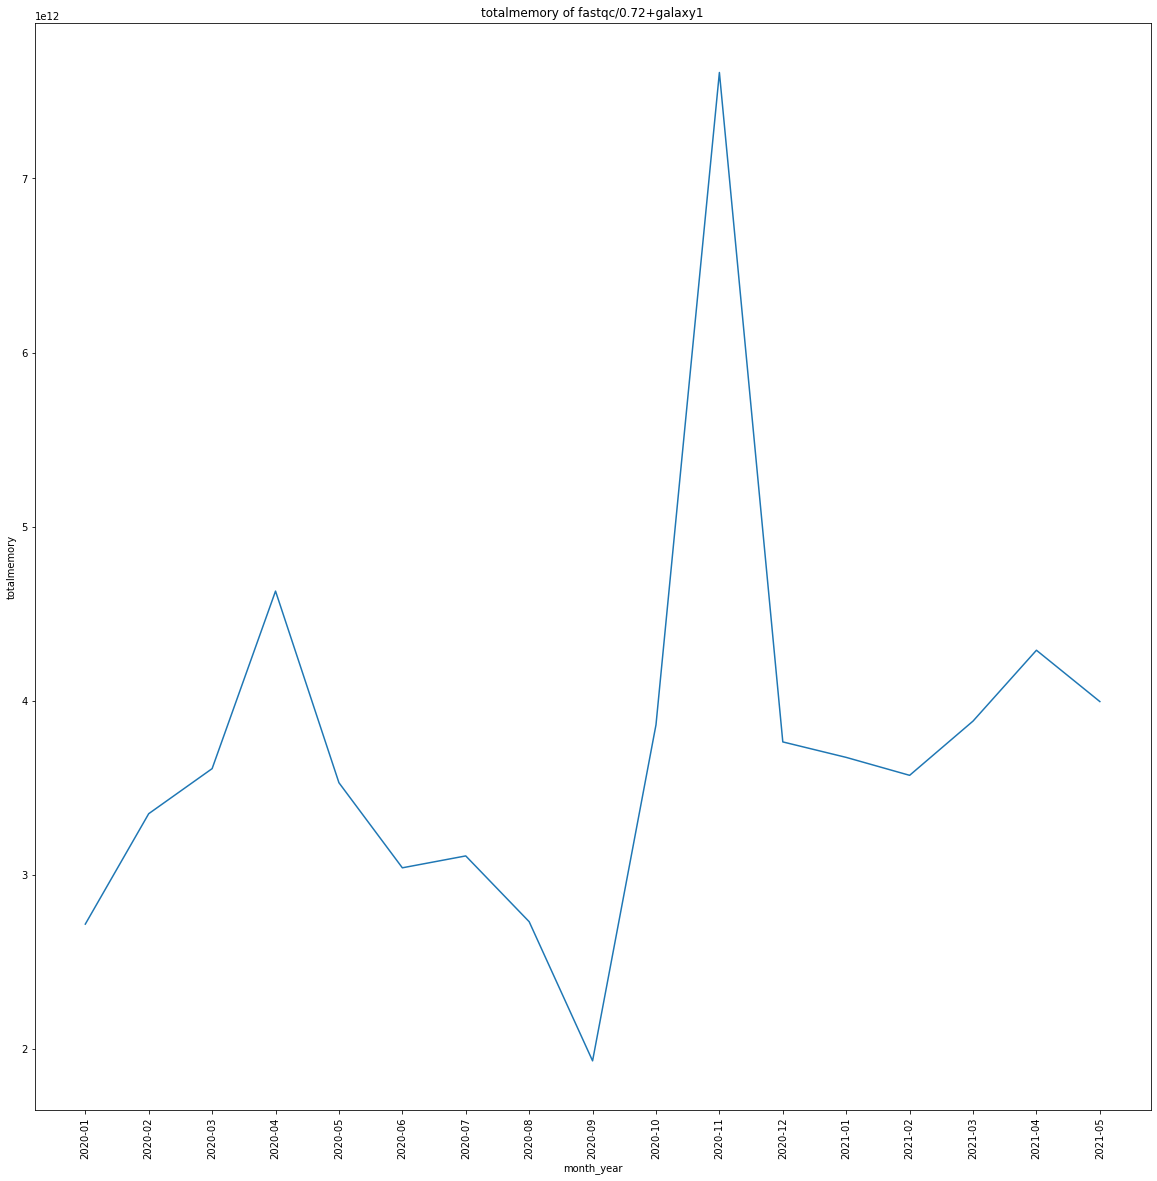

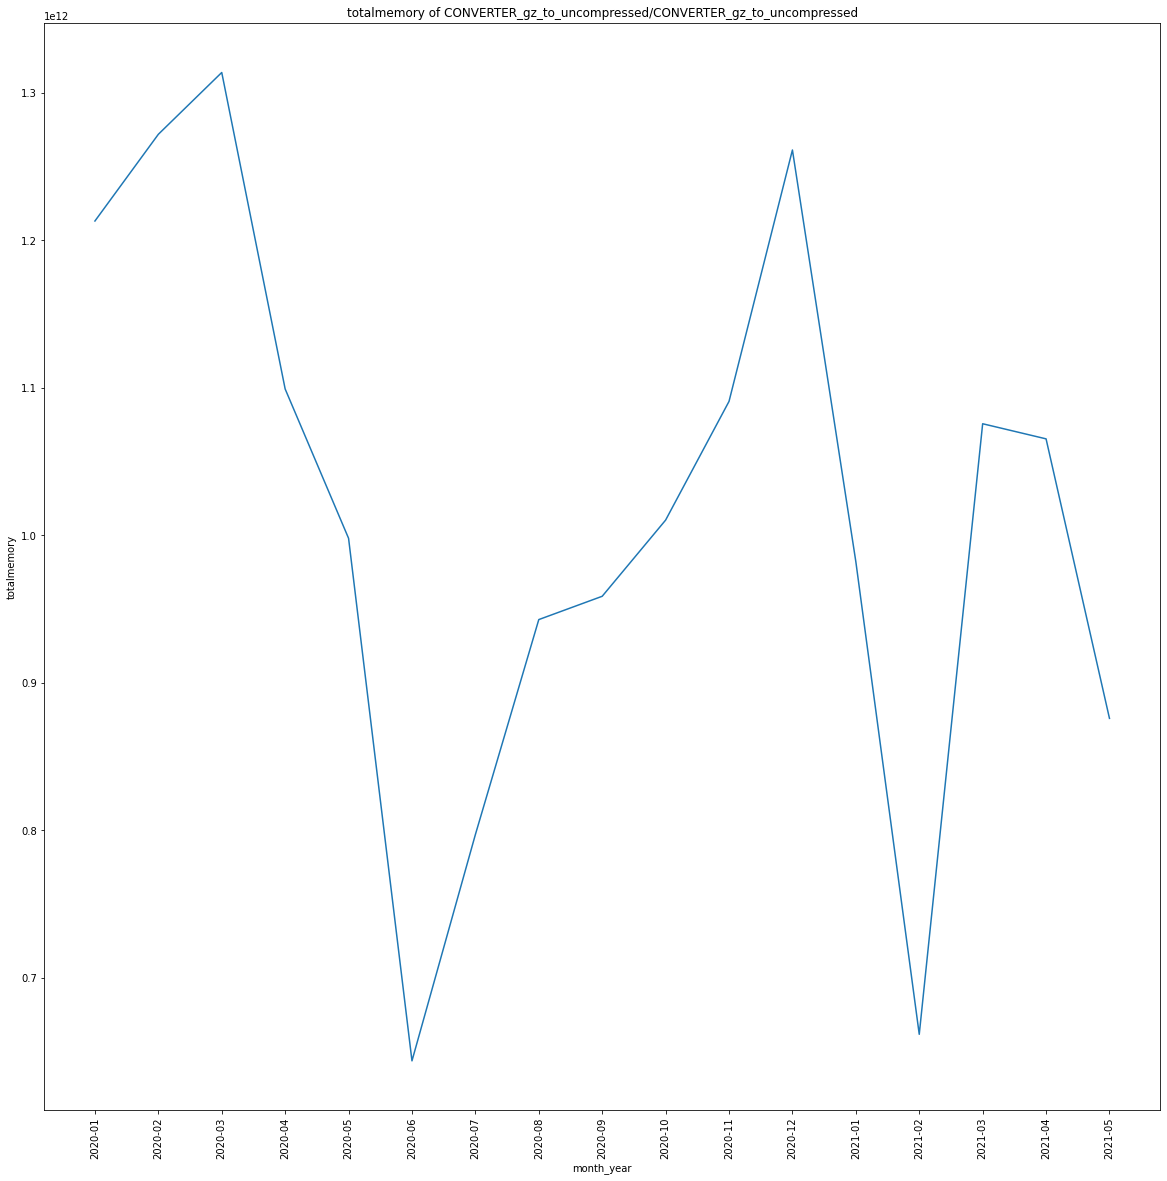

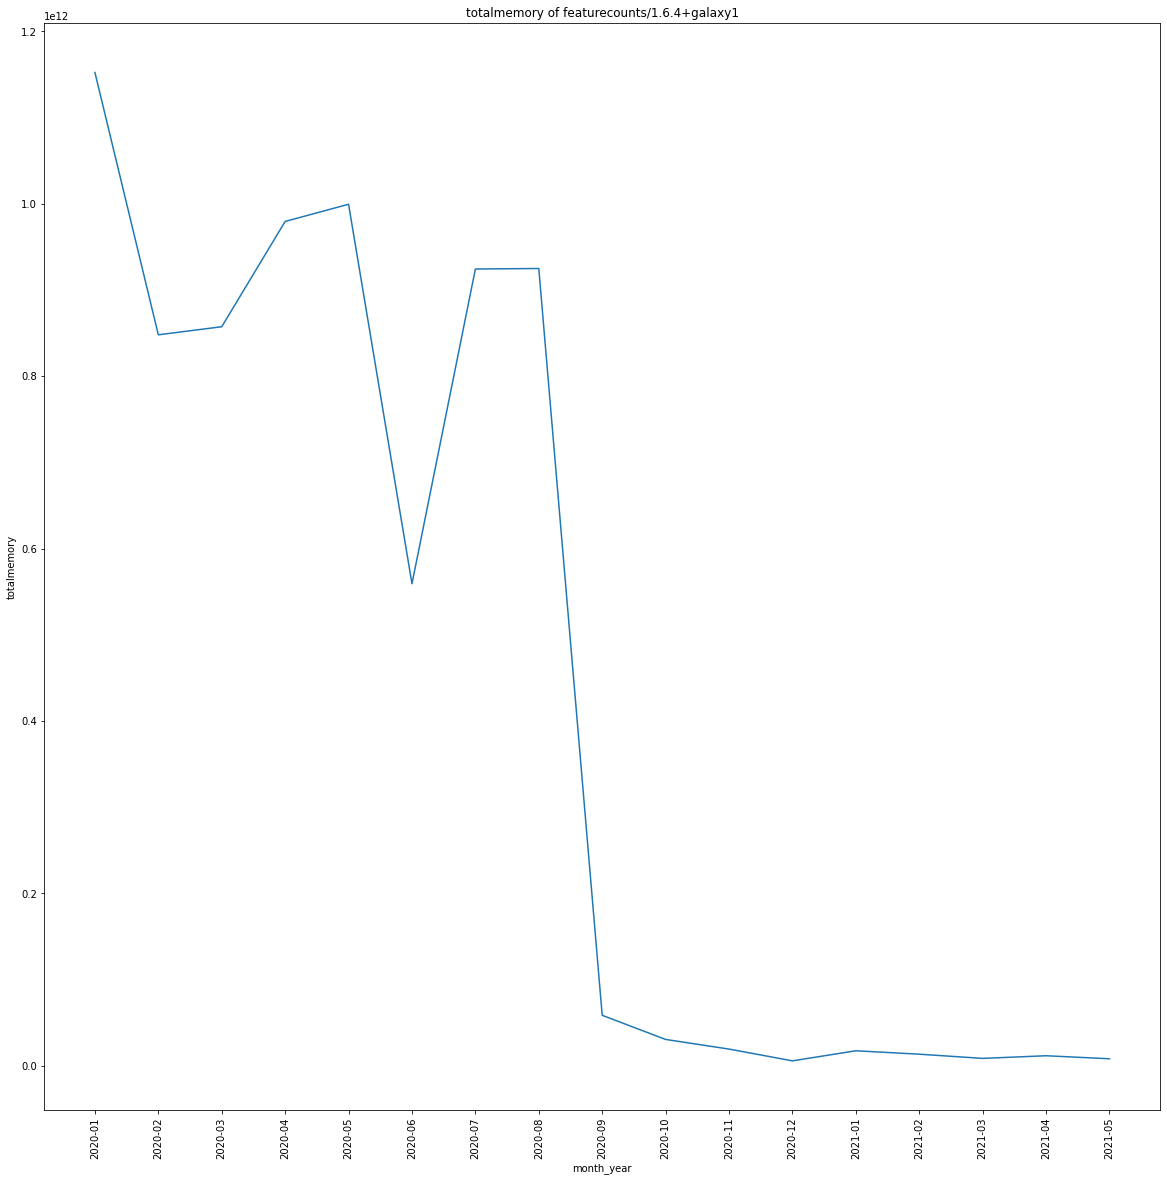

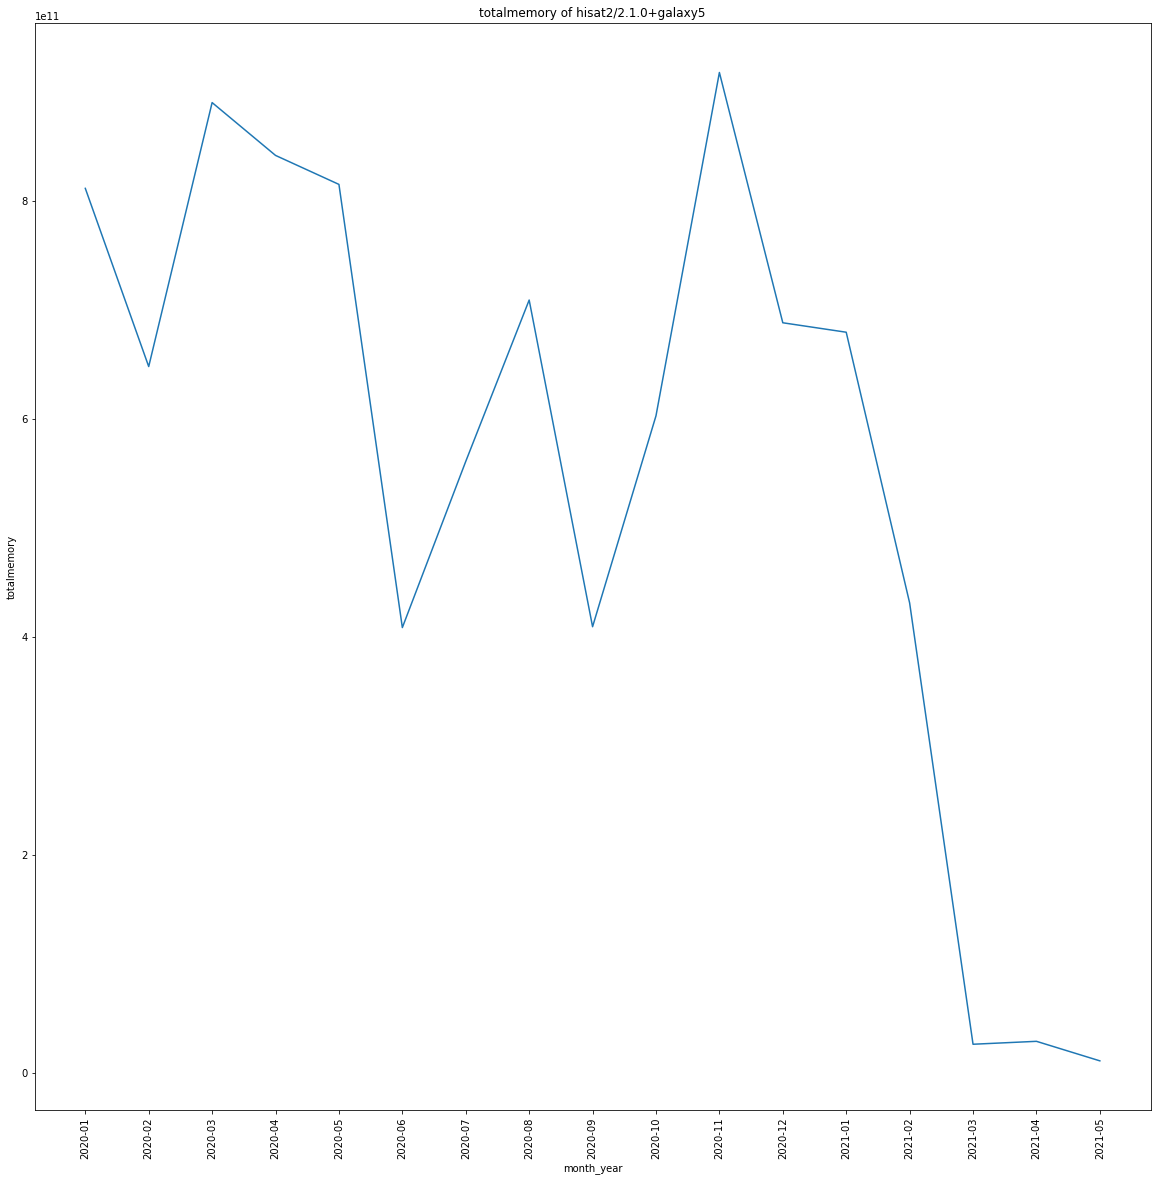

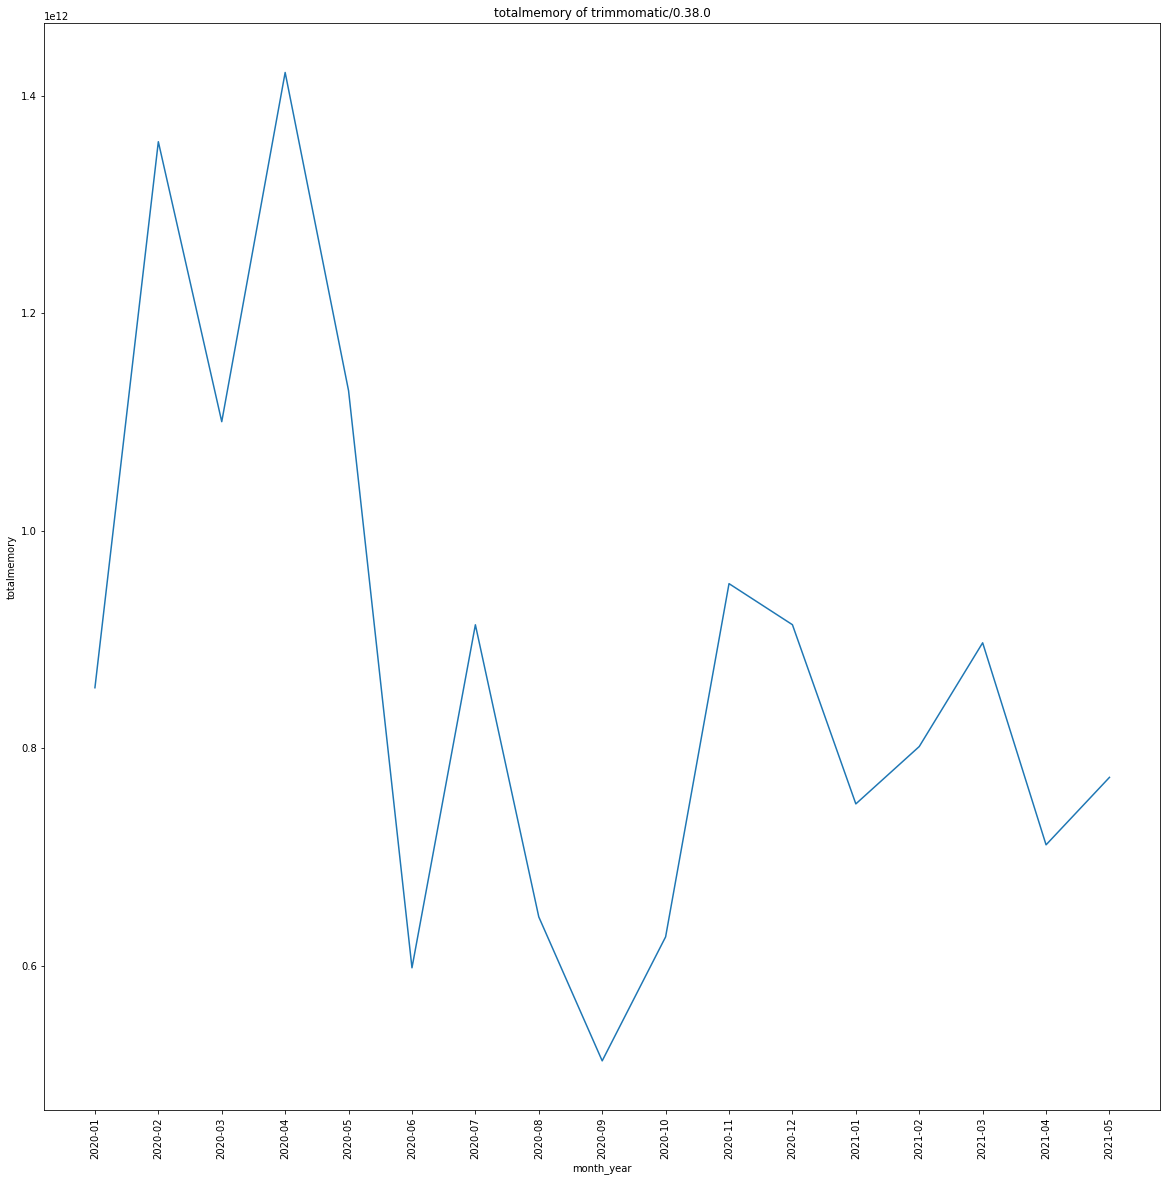

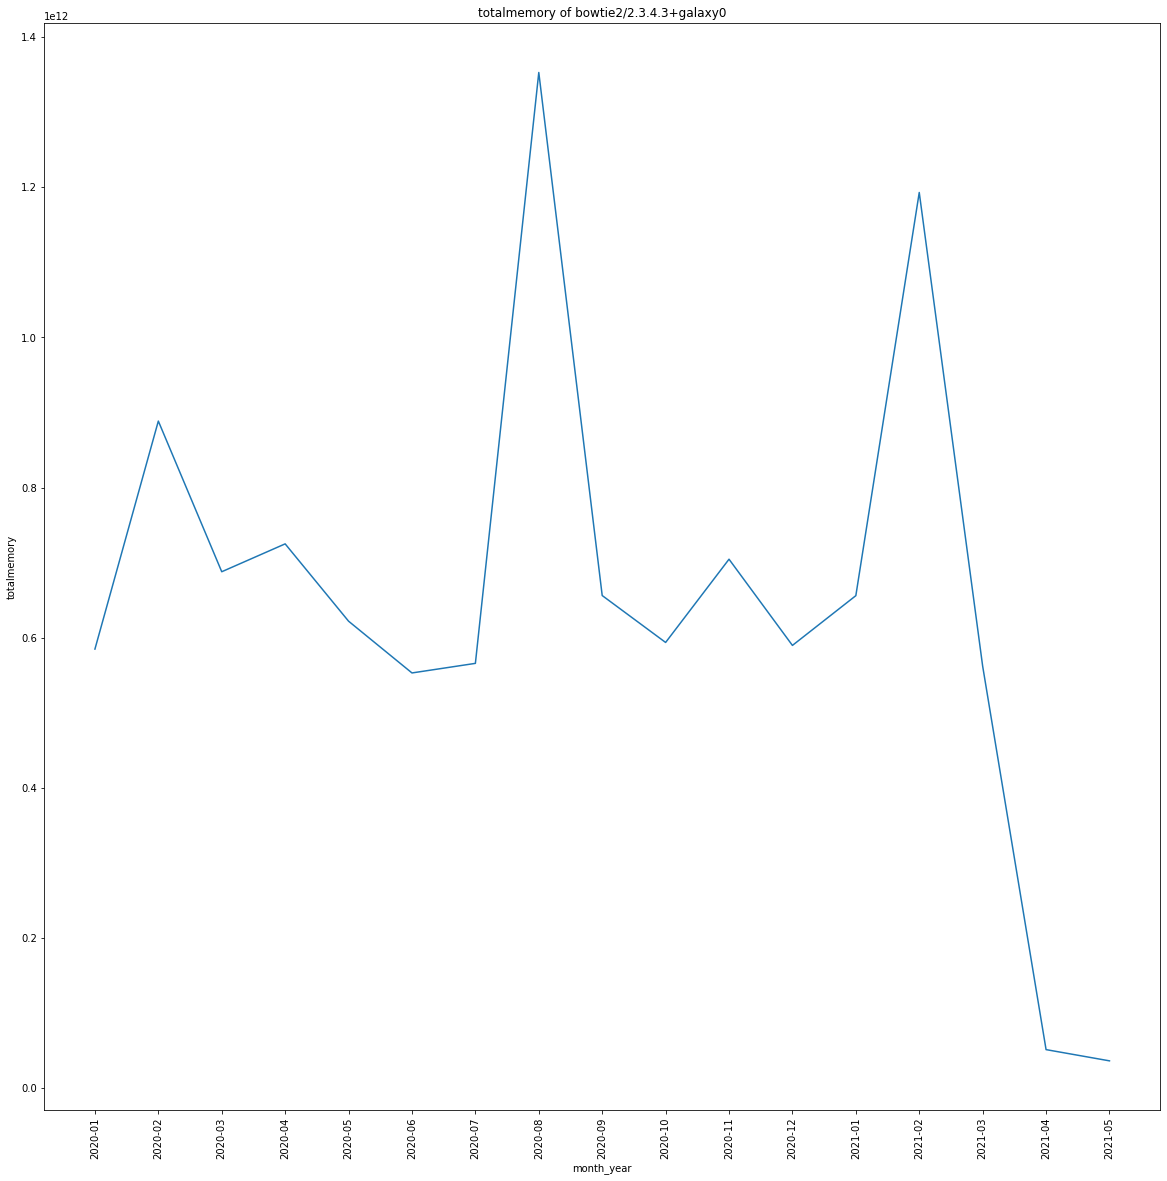

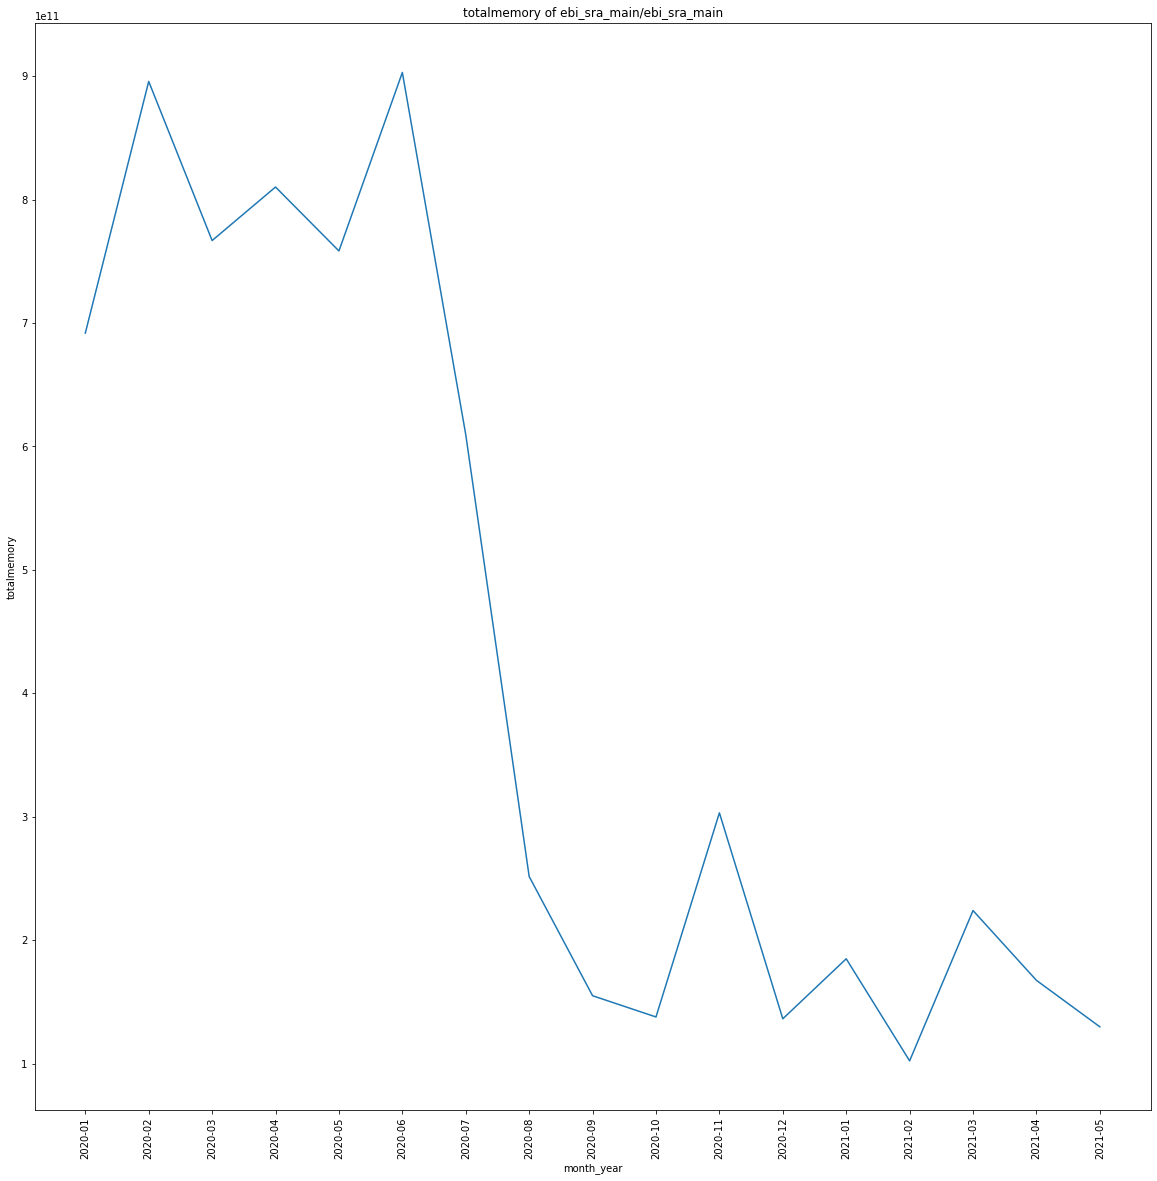

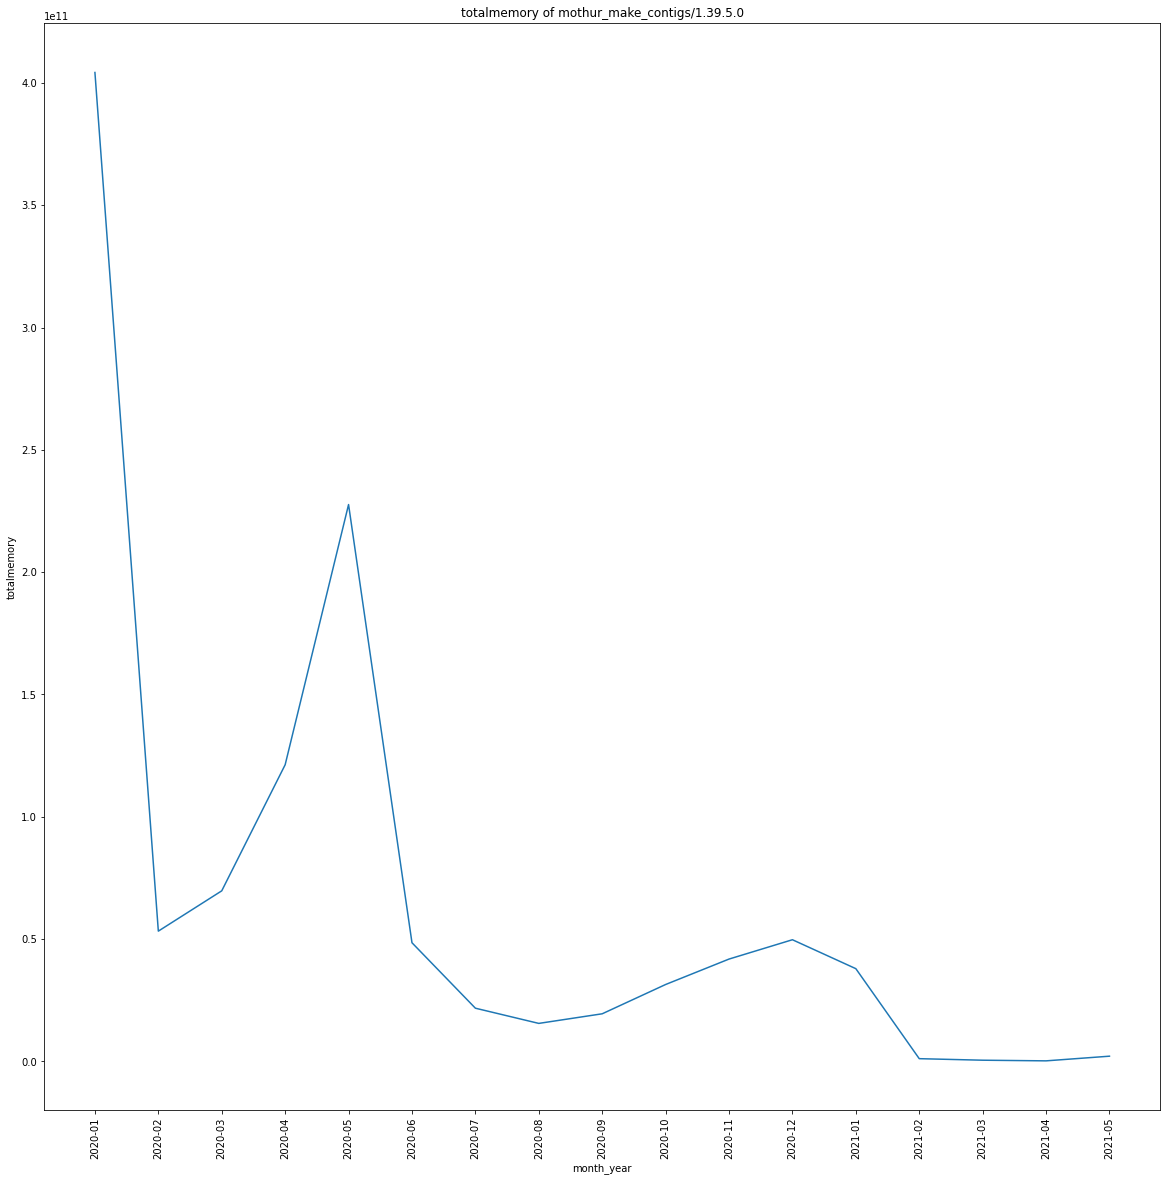

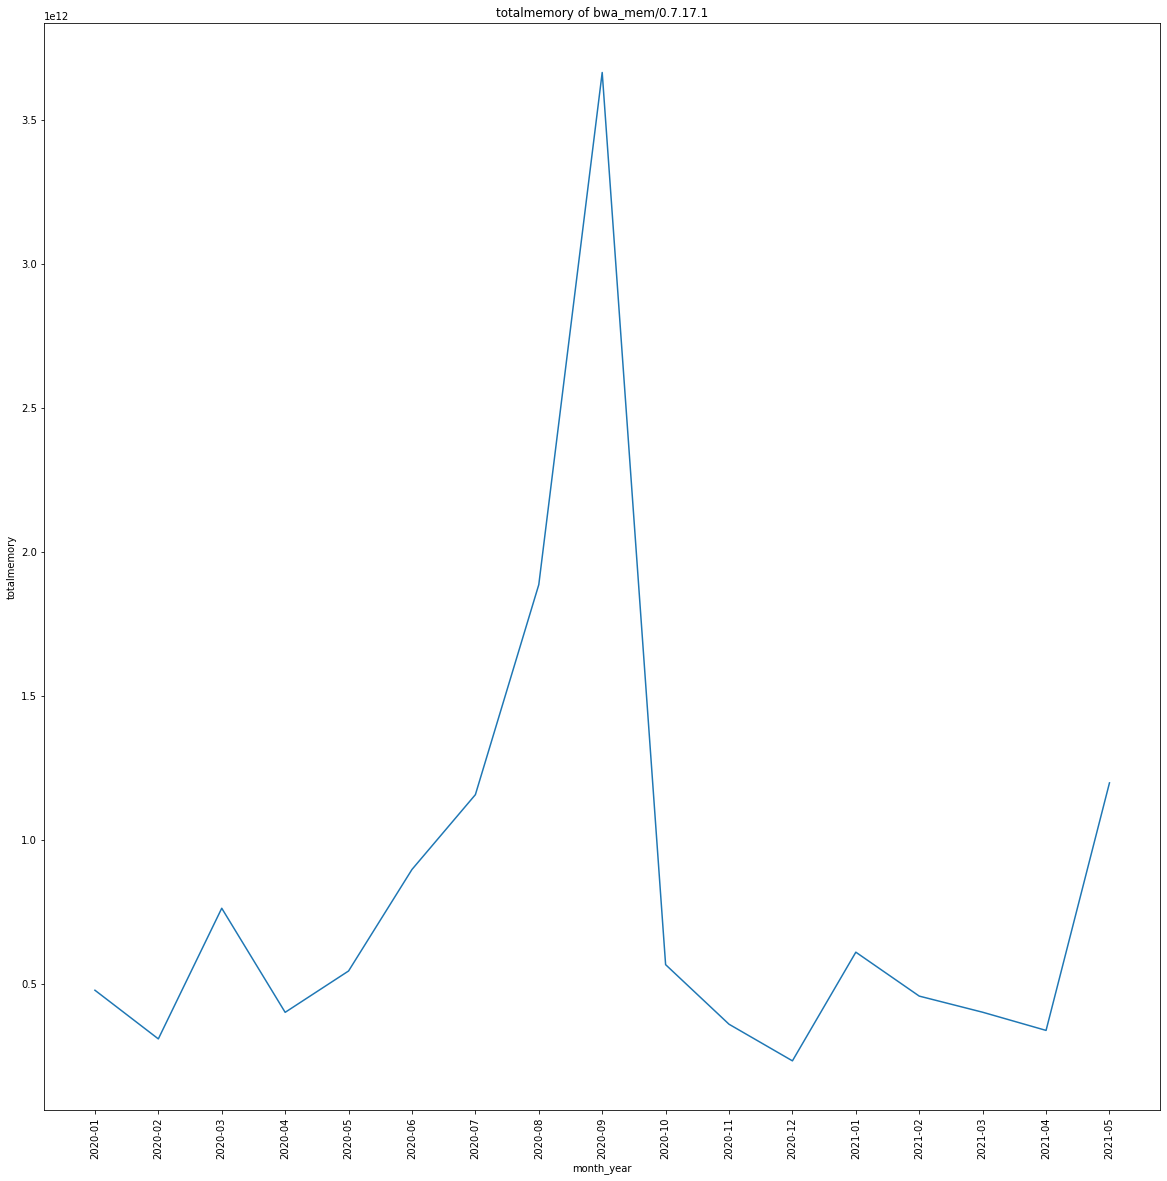

In [8]:
#print(os.listdir())
totalmemory_all = pd.read_csv('totalmemory_all.csv')
#print(totalmemory_all)
print(totalmemory_all.columns)
print(totalmemory_all.shape)
print(totalmemory_all['totalmemory'])

#totalmemory_all.head(5)
#totalmemory_all['totalmemory']
index = 0
for tool in ten_most_popular_tools:
  index += 1
  totalmemory_tool = totalmemory_all.loc[totalmemory_all['tool_name_version'] == tool]
  totalmemory_tool_list = [memory for memory in totalmemory_tool['totalmemory']]
  month_year_tool = totalmemory_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (20,20))
  plt.plot(month_year_tool_processed,totalmemory_tool_list)
  plt.xticks(rotation = 90)

  title = 'totalmemory of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('totalmemory')
  file_name = "most_popular_tool" + str(index) + "totalmemory"
  plt.savefig(file_name)

<p align = "justify">
Here, we will plot the number of users across the 10 most popular tools (based on the number of jobs) from January 2020 to May 2021.
</p>

In [7]:
#print(os.listdir())
numusers_all = pd.read_csv('numusers_all.csv')
#print(totalmemory_all)
print(numusers_all.columns)
print(numusers_all.shape)
print(numusers_all['num_users'])
#numusers_tool = numusers

'''index = 0
for tool in ten_most_popular_tools:
  index += 1
  numusers_tool = numusers_all.loc[numusers_all['tool_name_version'] == tool]
  numusers_tool_list = [numusers for numusers in numusers_all['num_users']]
  month_year_tool = numusers_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (20,20))
  plt.plot(month_year_tool_processed,numusers_tool_list)
  plt.xticks(rotation = 90)

  title = 'numusers of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('numusers')
  file_name = "most_popular_tool" + str(index) + "numusers"'''

Index(['Unnamed: 0', 'month_year', 'num_users', 'tool_name_version'], dtype='object')
(24504, 4)
0        3731.0
1        1515.0
2         827.0
3         758.0
4         715.0
          ...  
24499       0.0
24500       0.0
24501       0.0
24502       0.0
24503       0.0
Name: num_users, Length: 24504, dtype: float64


'index = 0\nfor tool in ten_most_popular_tools:\n  index += 1\n  numusers_tool = numusers_all.loc[numusers_all[\'tool_name_version\'] == tool]\n  numusers_tool_list = [numusers for numusers in numusers_all[\'num_users\']]\n  month_year_tool = numusers_tool[\'month_year\']\n  month_year_tool_processed = [month_year.replace(\' \',\'\') for month_year in list(month_year_tool)]\n  plt.figure(figsize = (20,20))\n  plt.plot(month_year_tool_processed,numusers_tool_list)\n  plt.xticks(rotation = 90)\n\n  title = \'numusers of \' + tool\n  plt.title(title)\n  plt.xlabel(\'month_year\')\n  plt.ylabel(\'numusers\')\n  file_name = "most_popular_tool" + str(index) + "numusers"'